# **Data Visualization**

## 1. Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/wrangling_processed_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0


## 2. EDA

### 2.1. Plot a histogram of `ConvertedComp.`

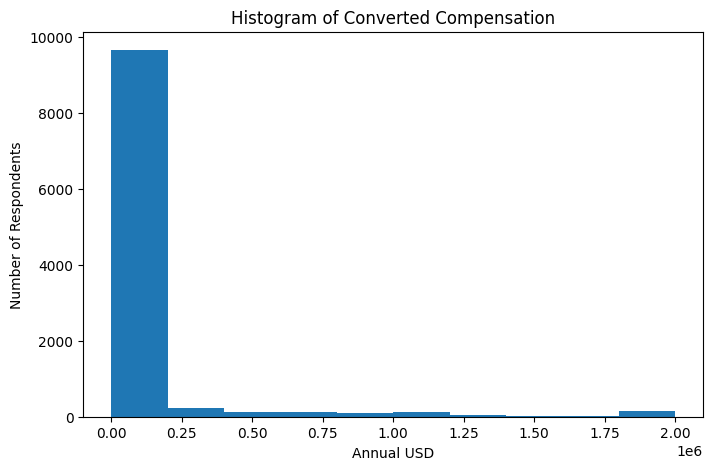

In [4]:
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Converted Compensation')
plt.ylabel('Number of Respondents')
plt.xlabel('Annual USD')
plt.show()

### 2.2. Plot a box plot of `Age.`

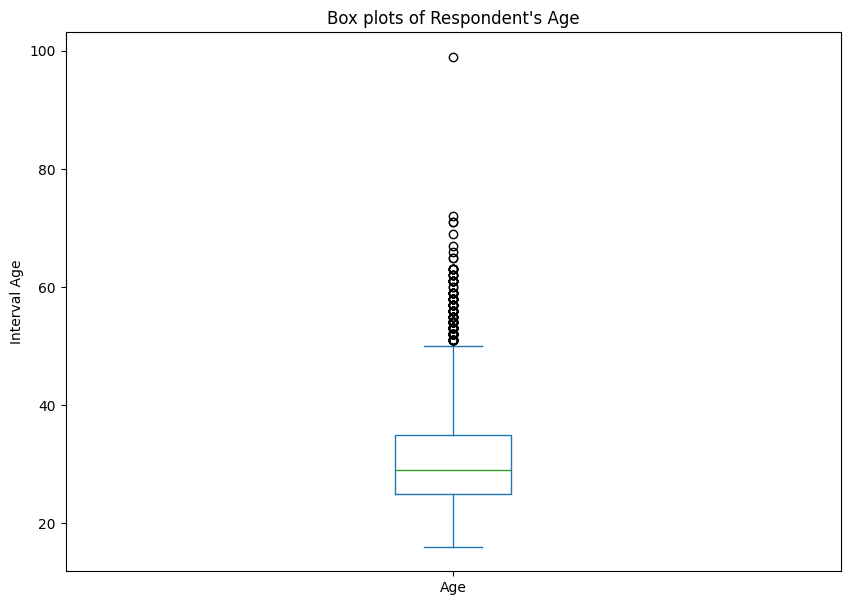

In [5]:
df['Age'].plot(kind='box', figsize=(10, 7))

plt.title("Box plots of Respondent's Age")
plt.ylabel('Interval Age')
plt.show()

### 2.3. Create a scatter plot of `Age` and `WorkWeekHrs.`

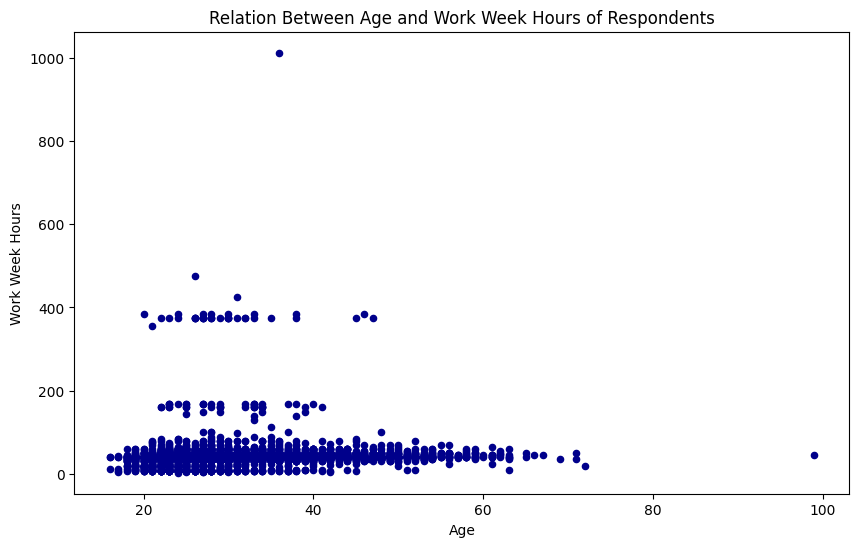

In [6]:
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10,6), color='darkblue')

plt.title('Relation Between Age and Work Week Hours of Respondents')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### 2.4. Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.

In [7]:
# normalize Age data
norm_Age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

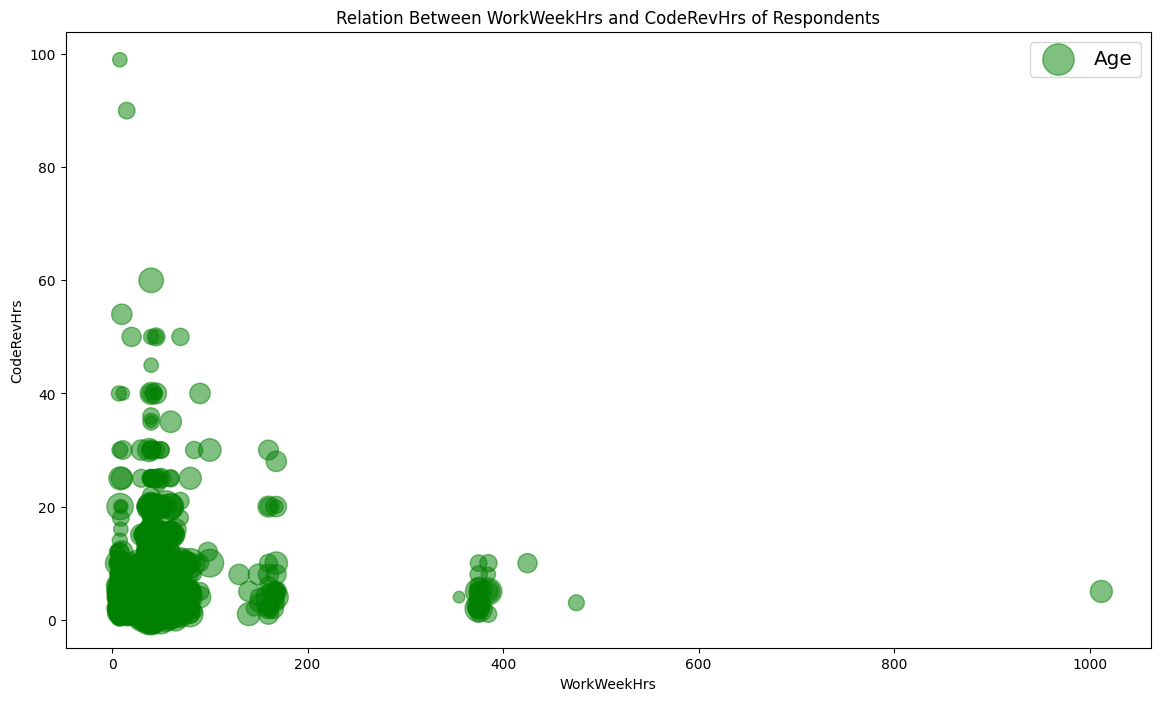

In [8]:
df.plot(kind='scatter',
               x='WorkWeekHrs',
               y='CodeRevHrs',
               figsize=(14, 8),
               alpha=0.5,  # transparency
               color='green',
               s=norm_Age * 1000 + 10,  # pass in weights 
               )

plt.title('Relation Between WorkWeekHrs and CodeRevHrs of Respondents')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(['Age'], loc='upper right', fontsize='x-large')

plt.show()

### 2.5. Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

In [37]:
df_split = df['DatabaseDesireNextYear'].str.get_dummies(sep=';')

df_onehot = df_split.copy()
df_final = pd.concat([df['DatabaseDesireNextYear'], df_onehot], axis=1)
df_final.drop('DatabaseDesireNextYear', axis=1, inplace=True)
top_10_most_common = df_onehot.sum().nlargest(10)

print("Top 10 DatabaseDesireNextYear:")
print(top_10_most_common)

df_top_10 = top_10_most_common.reset_index()
df_top_10.columns = ['database', 'count']

df_top_10.to_csv('data/top/databases.csv', index=False)

Top 10 DatabaseDesireNextYear:
PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
dtype: int64


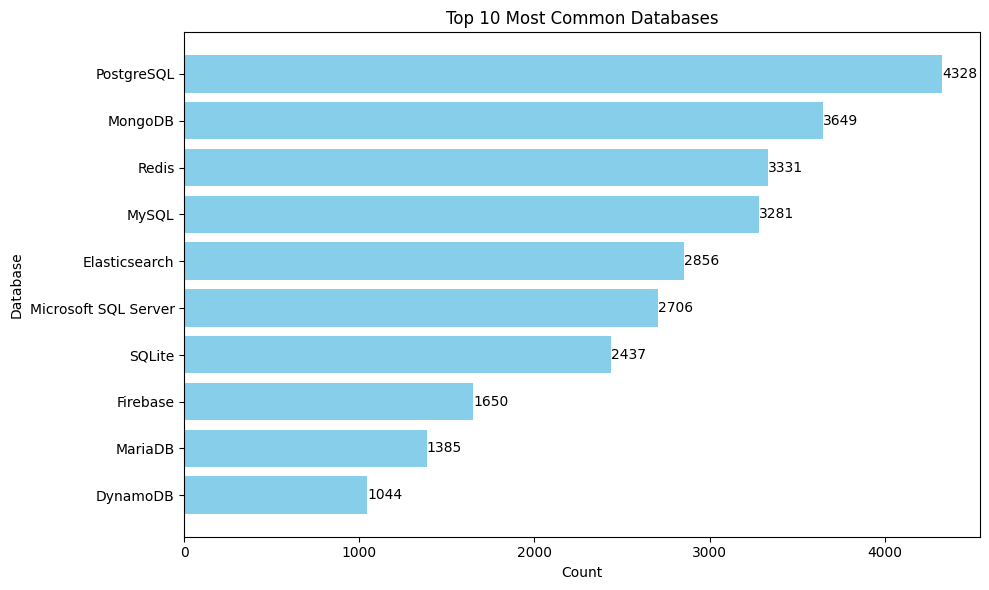

In [38]:
df_top_10 = df_top_10.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_top_10['database'], df_top_10['count'], color='skyblue') 

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Count')  
plt.ylabel('Database') 
plt.title('Top 10 Most Common Databases')
plt.tight_layout()
plt.show()

### 2.6. Create a pie chart of the top 5 languages that respondents wish to learn next year. Label the pie chart with language names. Display percentages of each language on the pie chart.

In [39]:
df_split = df['LanguageDesireNextYear'].str.get_dummies(sep=';')

df_onehot = df_split.copy()
df_final = pd.concat([df['LanguageDesireNextYear'], df_onehot], axis=1)
df_final.drop('LanguageDesireNextYear', axis=1, inplace=True)
top_10_most_common = df_onehot.sum().nlargest(10)

print("Top 5 LanguageDesireNextYear:")
print(top_10_most_common)

df_top_10 = top_10_most_common.reset_index()
df_top_10.columns = ['language', 'count']

df_top_10.to_csv('data/top/language.csv', index=False)
plt.show()

Top 5 LanguageDesireNextYear:
JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
dtype: int64


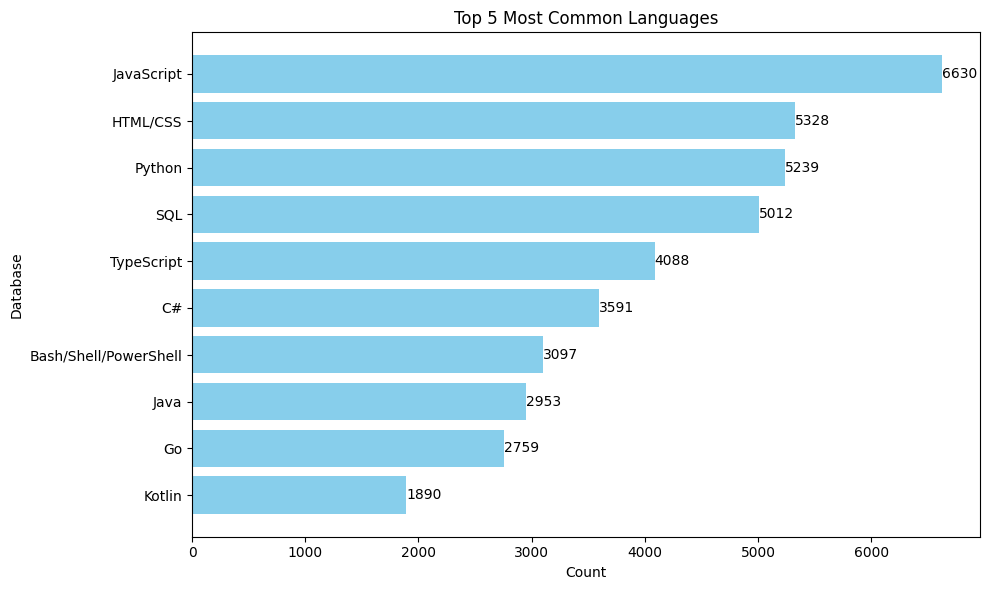

In [40]:
df_top_10 = df_top_10.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_top_10['language'], df_top_10['count'], color='skyblue') 

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Count')  
plt.ylabel('Database') 
plt.title('Top 10 Most Common Languages')
plt.tight_layout()
plt.show()

### 2.7. Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

In [14]:
df_stacked = df[['CodeRevHrs', 'WorkWeekHrs', 'Age']].loc[(df['Age'] >= 30) & (df['Age'] <= 35)].reset_index().drop(columns=['index'])
df_stacked

,CodeRevHrs,WorkWeekHrs,Age
0,3.0,8.0,31.0
1,2.0,40.0,34.0
2,2.0,40.0,32.0
3,15.0,42.0,34.0
4,2.0,40.0,33.0
...,...,...,...
2936,4.0,42.0,32.0
2937,2.0,50.0,32.0
2938,14.0,56.0,32.0
2939,5.0,40.0,34.0


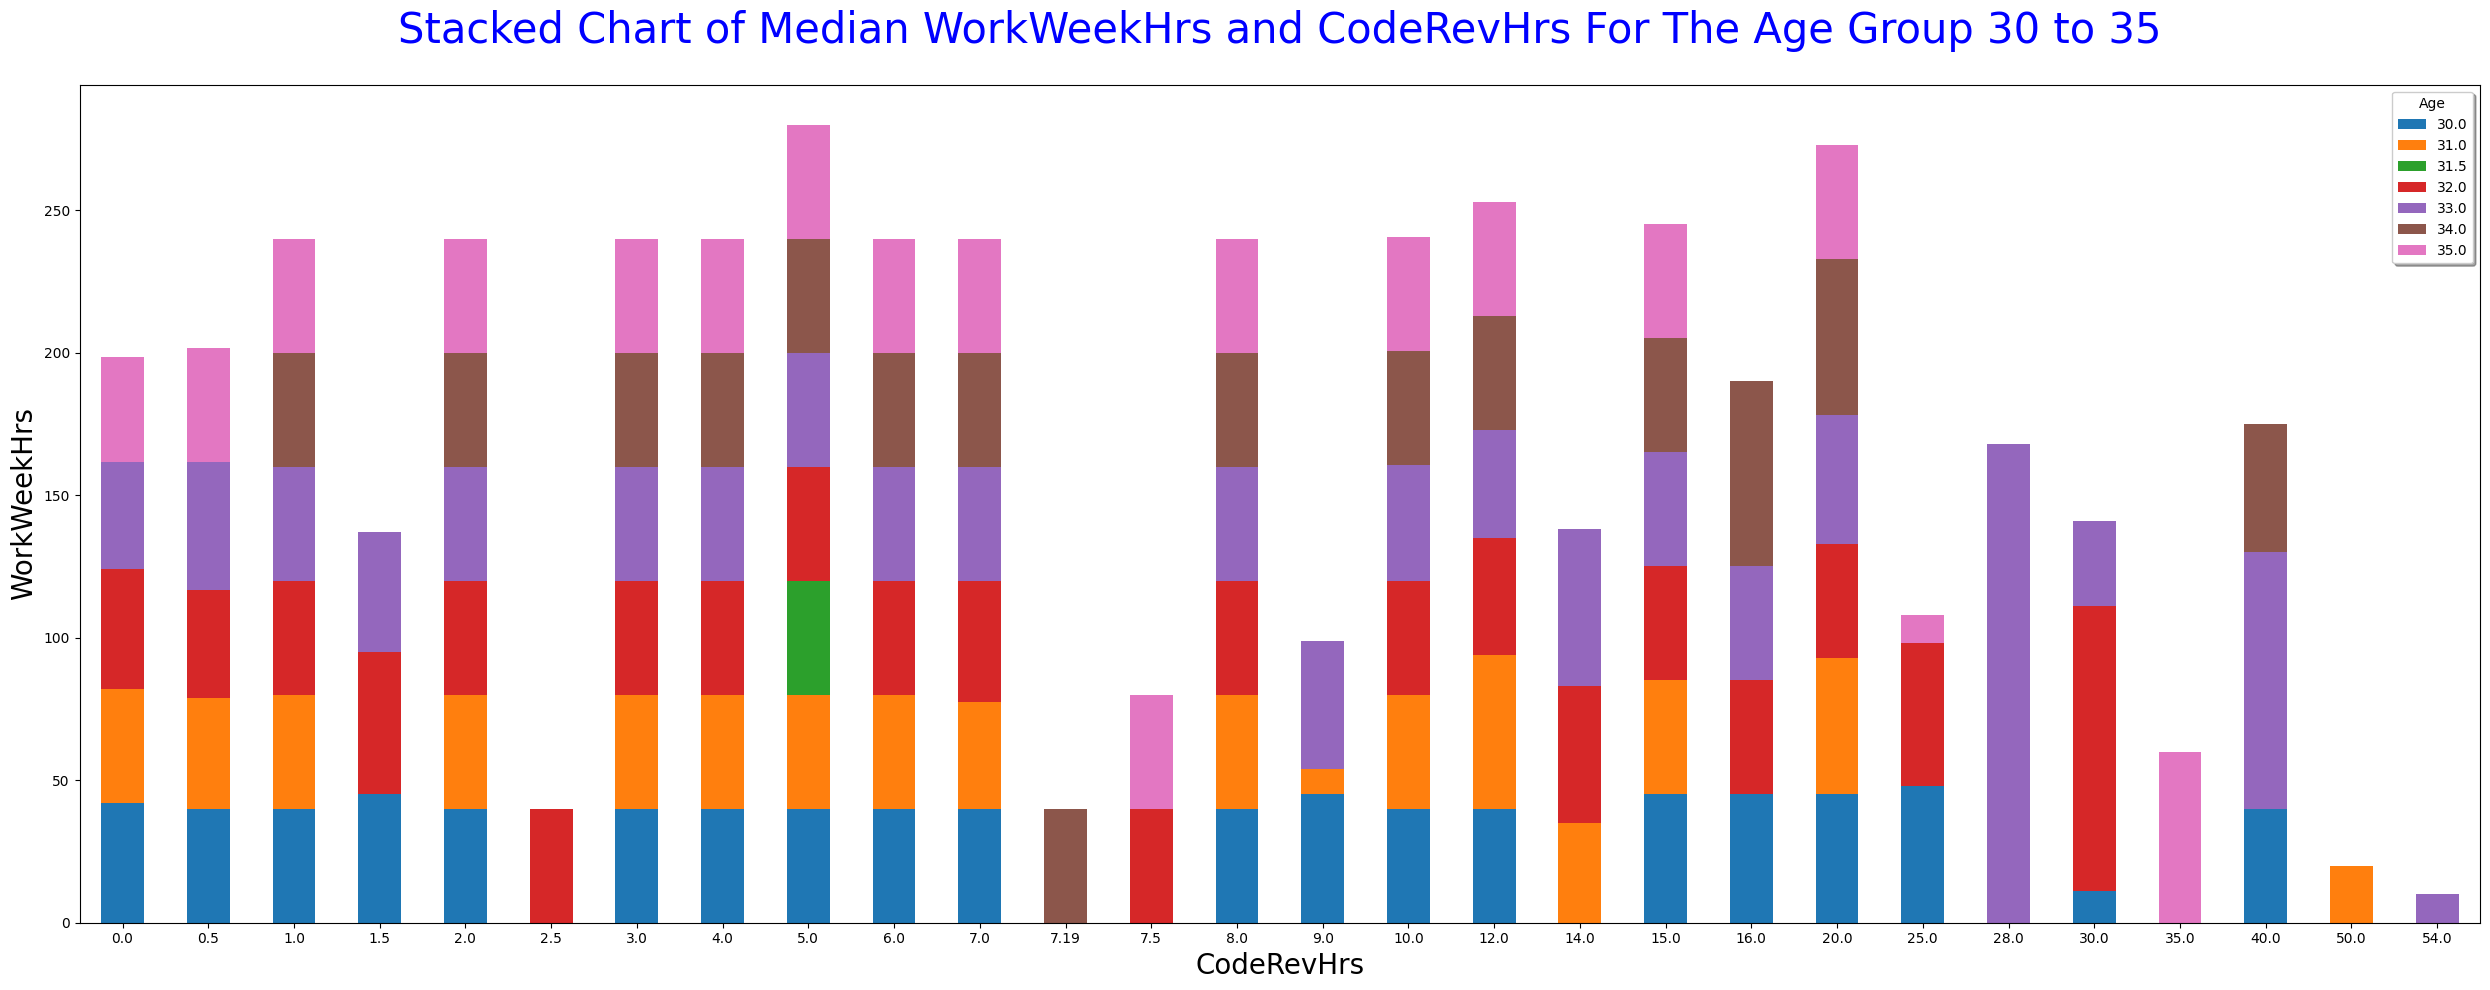

In [17]:
df_stacked.groupby(['CodeRevHrs','Age'])['WorkWeekHrs'].median().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True, figsize=(25, 10))
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs For The Age Group 30 to 35',
          loc='center',pad=30, fontsize=30, color='blue')
plt.xlabel('CodeRevHrs', fontsize = 20)
plt.ylabel('WorkWeekHrs', fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='Age')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.8. Plot the median `ConvertedComp` for all ages from 25 to 30.

In [23]:
df_line = df[['ConvertedComp', 'Age']].loc[(df['Age'] >= 25) & (df['Age'] <= 30)].reset_index().drop(columns=['index'])
df_line.dropna(inplace=True)
df_line

,ConvertedComp,Age
0,90000.0,28.0
1,455352.0,26.0
2,65277.0,29.0
3,20623.0,27.0
4,107000.0,27.0
...,...,...
4309,7724.0,26.0
4310,35518.0,26.0
4311,26586.0,26.0
4312,19880.0,25.0


In [24]:
df_line['Age'] = df_line['Age'].round()
df_line = df_line.groupby('Age', axis=0).median()
df_line

C:\Users\tttoa\AppData\Local\Temp\ipykernel_13748\1474524753.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_line = df_line.groupby('Age', axis=0).median()


,ConvertedComp
Age,
25.0,39714.0
26.0,43834.0
27.0,49620.0
28.0,51559.0
29.0,55674.0
30.0,56376.0


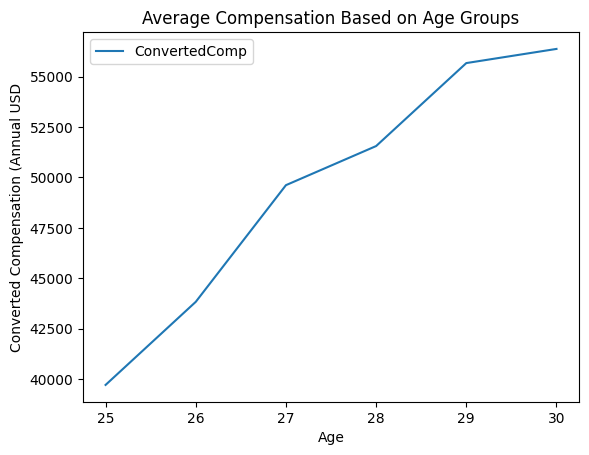

In [25]:
df_line.plot(kind='line')

plt.title('Average Compensation Based on Age Groups')
plt.ylabel('Converted Compensation (Annual USD')
plt.xlabel('Age')

plt.show()

### 2.9. Create a horizontal bar chart using column `DevType.`

In [42]:
df_split = df['DevType'].str.get_dummies(sep=';')

df_onehot = df_split.copy()
df_final = pd.concat([df['DevType'], df_onehot], axis=1)
df_final.drop('DevType', axis=1, inplace=True)
top_10_most_common = df_onehot.sum().nlargest(10)

print("Top 10 DevType:")
print(top_10_most_common)

df_top_10 = top_10_most_common.reset_index()
df_top_10.columns = ['devtype', 'count']

df_top_10.to_csv('data/top/devtype.csv', index=False)

Top 10 DevType:
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
dtype: int64


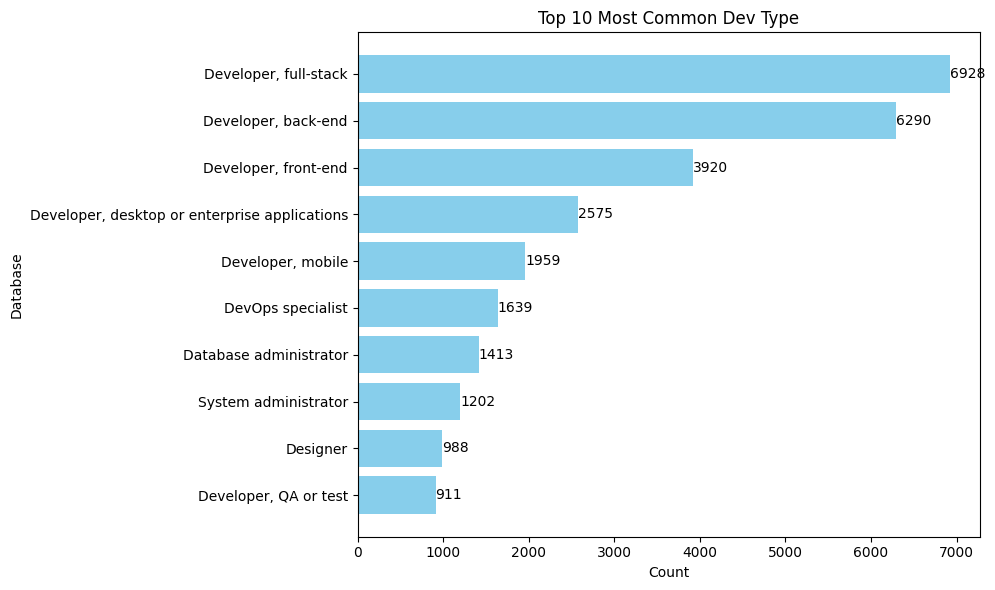

In [43]:
df_top_10 = df_top_10.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_top_10['devtype'], df_top_10['count'], color='skyblue') 

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Count')  
plt.ylabel('Database') 
plt.title('Top 10 Most Common Dev Type')
plt.tight_layout()
plt.show()